# load data

In [1]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
x = iris.data
y = iris.target

display(x.head(1))
display(y.head(1))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2


0    0
Name: target, dtype: int64

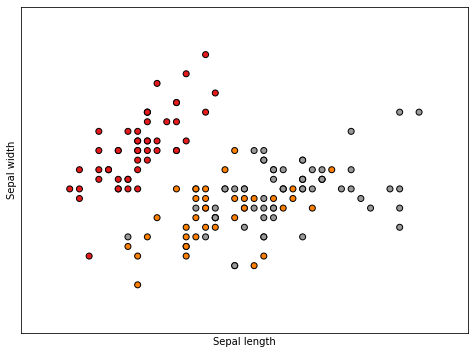

In [2]:
import matplotlib.pyplot as plt

x_min, x_max = x.iloc[:, 0].min() - .5, x.iloc[:, 0].max() + .5
y_min, y_max = x.iloc[:, 1].min() - .5, x.iloc[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

# train and save model

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x.values[:, :2], y.values, test_size=0.25, random_state=16)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(112, 2) (112,) (38, 2) (38,)


In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs')
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.7631578947368421

In [5]:
from joblib import dump

dump(model, '../app/model/model.joblib')

['../app/model/model.joblib']

In [6]:
from joblib import load

model = load('../app/model/model.joblib')
model.predict(x_test)

array([2, 0, 2, 2, 1, 0, 2, 0, 0, 1, 1, 2, 1, 0, 2, 1, 0, 0, 1, 1, 0, 0,
       1, 2, 2, 1, 2, 2, 2, 0, 2, 2, 0, 1, 0, 1, 0, 1])

# test api

In [7]:
import sys
from pathlib import Path

root = Path().absolute().parent

if str(root) not in sys.path:
    sys.path.append(str(root))
    print(f"{root} added to path")

/home/dmt/fastapi_basic_example added to path
